# Решение СЛАУ

Будем решать систему линейных уравнений методом Крамера.  Если определитель системы отличен от нуля, то система линейных уравнений имеет одно единственное решение, причём неизвестное равно отношению определителей. В знаменателе – определитель системы, а в числителе – определитель, полученный из определителя системы путём замены коэффициентов при этом неизвестном свободными членами.

### Условия применимости:

Метод Крамера может быть использован в решении системы стольких линейных уравнений, сколько в каждом уравнении неизвестных. Если определитель системы не равен нулю, то метод Крамера может быть использован в решении, если же равен нулю, то не может. Кроме того, метод Крамера может быть использован в решении систем линейных уравнений, имеющих единственное решение.

In [1]:
from __future__ import division

In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Реализуем метод Крамера

In [3]:
def kramer(m, b):
    tmp = list(zip(*m))
    delta = np.linalg.det(tmp)
    if delta == 0:
        return "Решений нет"
    result = []
    for i in range(len(m)):
        A = tmp[:]
        A[i] = b
        result.append((np.linalg.det(A) / delta))
    return np.array(result)

Функция, вычисляющая матричную норму:

In [4]:
def matrix_norm(A):
    return max(np.apply_along_axis(lambda a: abs(a).sum(), 1, A))   

In [5]:
def solve_system(matr, b):
    A = matr
    det_A = np.linalg.det(A)
    norm_A = matrix_norm(A)
    cond_A = norm_A * matrix_norm(np.linalg.inv(A))
    x = kramer(matrix, b).reshape(-1, 1)
    E = abs(b.reshape(-1,1) - np.dot(A, x))
    return(det_A, norm_A, cond_A, x, E)

In [6]:
def print_result(det_A, norm_A, cond_A, x, E):
    print("x = \n")
    print(x)
    print("\nНевязка \n")
    print(E)
    print("\nОпределитель: %.2f" % det_A)
    print("Норма: %.2f" % norm_A)
    print("Число обусловенности: %.2f" % cond_A)

Найдем решение уравнения $Ax=b$, если 
$$
\begin{equation}
    A = \begin{pmatrix}
        1 & 2 & 3 \\
        2.001 & 3.999 & 6 \\         
        15 & 3 & 6
        \end{pmatrix} \quad
    b = \begin{pmatrix}
            1 \\
            2\\         
            3
        \end{pmatrix}
\end{equation}
$$


In [7]:
matrix = np.array([[1,2,3],
                  [2.001, 3.999, 6],
                  [15, 3, 6]])
b = np.array([1, 2, 3])
det_A, norm_A, cond_A, x, E = solve_system(matrix, b)
print_result(det_A, norm_A, cond_A, x, E)

x = 

[[ 0.08333333]
 [ 0.08333333]
 [ 0.25      ]]

Невязка 

[[  1.33226763e-15]
 [  2.66453526e-15]
 [  2.66453526e-15]]

Определитель: 0.04
Норма: 24.00
Число обусловенности: 77998.00


Найдем решение уравнения $Ax=b$, если 
$$
\begin{equation}
    A = \begin{pmatrix}
        1 & \frac{1}{2} & \frac{1}{3} \\
        \frac{1}{2} & \frac{1}{3} & \frac{1}{4} \\         
        \frac{1}{3} & \frac{1}{4} & \frac{1}{5}
        \end{pmatrix} \quad
    b = \begin{pmatrix}
            1 \\
            2\\         
            3
        \end{pmatrix}
\end{equation}
$$


In [8]:
matrix = np.array([[1,1/2,1/3],
                   [1/2, 1/3, 1/4],
                   [1/3, 1/4, 1/5]])
b = np.array([1, 2, 3])
det_A, norm_A, cond_A, x, E = solve_system(matrix, b)
print_result(det_A, norm_A, cond_A, x, E)

x = 

[[  27.]
 [-192.]
 [ 210.]]

Невязка 

[[  1.13686838e-13]
 [  6.39488462e-14]
 [  4.97379915e-14]]

Определитель: 0.00
Норма: 1.83
Число обусловенности: 748.00


Найдем решение уравнения $Ax=b$, если 
$$
\begin{equation}
    A = \begin{pmatrix}
        10^{6} & 2 \\        
        10^{13} & 2
        \end{pmatrix} \quad
    b = \begin{pmatrix}
            2 \\
            1        
        \end{pmatrix}
\end{equation}
$$

In [9]:
matrix = np.array([[10**6,2],
                   [10**13, 2]])
b = np.array([2, 1])
det_A, norm_A, cond_A, x, E = solve_system(matrix, b)
print_result(det_A, norm_A, cond_A, x, E)

x = 

[[ -1.00000010e-13]
 [  1.00000005e+00]]

Невязка 

[[  8.88178420e-16]
 [  2.22044605e-16]]

Определитель: -19999997999999.98
Норма: 10000000000002.00
Число обусловенности: 5000001000001.10


# Сплайн

Заполним матрицу:

In [10]:
def fill_in_matrix(A, b, n):
    j = 4
    for i in range(0, n):
        A[i][j * i + 3] = 1
        A[i][j * i + 2] = points[i]["x"]
        A[i][j * i + 1] = points[i]["x"]**2
        A[i][j * i + 0] = points[i]["x"]**3
        b[i] = points[i]["y"]

        A[n + i][j * i + 3] = 1
        A[n + i][j * i + 2] = points[i + 1]["x"]
        A[n + i][j * i + 1] = points[i + 1]["x"]**2
        A[n + i][j * i + 0] = points[i + 1]["x"]**3
        b[n + i] = points[ i + 1]["y"]
        
        if i != 0:    
            A[(j - 2) * n + (i - 1)][j * (i - 1) + 2] = 1
            A[(j - 2) * n + (i - 1)][j * (i - 1) + 1] = 2 * points[i]["x"]
            A[(j - 2) * n + (i - 1)][j * (i - 1) + 0] = 3 * points[i]["x"]**2

            A[(j - 2) * n + (i - 1)][j * (i - 1) + 6] = -1
            A[(j - 2) * n + (i - 1)][j * (i - 1) + 5] = -2 * points[i]["x"]
            A[(j - 2) * n + (i - 1)][j * (i - 1) + 4] = -3 * points[i]["x"]**2
            b[(j - 2) * n + (i - 1)] = 0

            A[(j - 1) * n + (i - 1)][j * (i - 1) + 1] = 2
            A[(j - 1) * n + (i - 1)][j * (i - 1) + 0] = 6 * points[i]["x"]
            A[(j - 1) * n + (i - 1)][j * (i - 1) + 5] = -2
            A[(j - 1) * n + (i - 1)][j * (i - 1) + 4] = -6 * points[i]["x"]
            b[(j - 1) * n + (i - 1)] = 0
        
    A[(j - 1) * n - 1][1] += 2
    A[(j - 1) * n - 1][0] += 6 * points[0]["x"]
    b[(j - 1) * n - 1] += 0

    A[(j - 1) * n + n - 1][j * (n - 1) + 1] += 2
    A[(j - 1) * n + n - 1][j * (n - 1) + 0] += 6 * points[n]["x"]
    b[(j - 1) * n + n - 1] += 0
    return(A, b)

Получим сам сплайн:

In [11]:
def getSpline(points):    
    points = sorted(points, key=lambda a: a["x"])

    n = len(points) - 1
    
    A = np.zeros((4 * n,4 * n))
    b = np.zeros((4 * n))

    A, b = fill_in_matrix(A, b, n)

    x = kramer(A, b)
    spline = []
    for i in range(0, n):
        spline.append({"u": points[i]["x"], "v": points[i + 1]["x"],
                        "a": float(x[4 * i + 0]),
                        "b": float(x[4 * i + 1]),
                        "c": float(x[4 * i + 2]),
                        "d": float(x[4 * i + 3])})
    return spline

Приведем полиномы к форме, которые можно будет подать на вход функции `eval`:

In [12]:
def Polynom(p):
    tmp = ""
    if p["a"] != 0:
        tmp += "%.2f*x**3" % p["a"]
    if p["b"] != 0:
        tmp += " + %.2f*x**2" % p["b"]
    if p["c"] != 0:
        tmp += " + %.2f*x" % p["c"]
    if p["d"] != 0:
        tmp += " + %.2f" % p["d"]
    return tmp

Вычисление значения функции:

In [13]:
def getf(function, x):
    try:
        return eval(function)
    except ZeroDivisionError:
        return 0

Получение сетки:

In [14]:
def getGrid(a, b, N, function, points):
    x = a
    h = float(b - a) / N
    for i in range(N + 1):
        y = getf(function, x)
        points.append({"x": x, "y": y})
        x += h

In [15]:
f_vect = np.vectorize(getf)

In [16]:
def getInterpolation(a, b, N, function, points):
    getGrid(a, b, N, function, points)
    spline = getSpline(points)
    y_spline = []
    for p in spline:
        x = np.linspace(p["u"], p["v"], 11)
        polyn = Polynom(p)
        y_spline += f_vect(polyn, x).tolist()
    return y_spline

Сначала посмотрим на случай гладкой функции:

In [17]:
function = 'x**2 + 1'
a = 1
b = 2
N = 10
points = []

In [18]:
y_spline_1 = getInterpolation(a, b, N, function, points)

In [19]:
N = 50
points = []

In [20]:
y_spline_2 = getInterpolation(a, b, N, function, points)

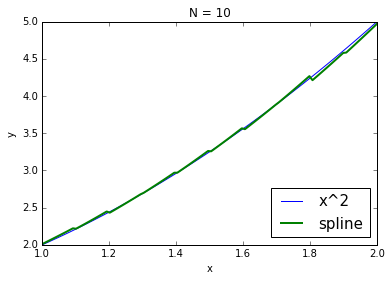

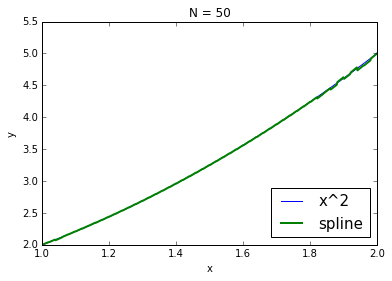

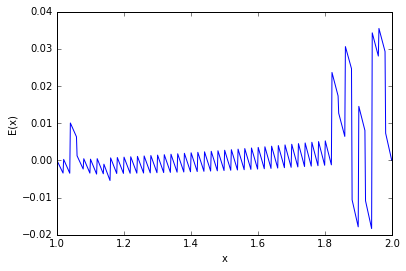

In [21]:
x = np.linspace(a, b, len(y_spline_1))
plt.plot(x, f_vect(function, x), label="x^2")
plt.plot(x, y_spline_1, linewidth=2, label="spline")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=15, loc=4)
plt.xlim(a, b)
plt.title('N = 10')
plt.show()


x = np.linspace(a, b, len(y_spline_2))
plt.plot(x, f_vect(function, x), label="x^2")
plt.plot(x, y_spline_2, linewidth=2, label="spline")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=15, loc=4)
plt.xlim(a, b)
plt.title('N = 50')
plt.show()


x = np.linspace(a, b, len(y_spline_2))
plt.plot(x, f_vect(function, x) - y_spline_2)
plt.xlabel('x')
plt.ylabel('E(x)')
plt.xlim(a, b)
plt.show()

Теперь посмотрим на случай разрывной функции:

In [22]:
function = 'math.sin(x)/x'
a = -1
b = 1
N = 10
points = []

In [23]:
y_spline_1 = getInterpolation(a, b, N, function, points)

In [24]:
N = 50
points = []

In [25]:
y_spline_2 = getInterpolation(a, b, N, function, points)

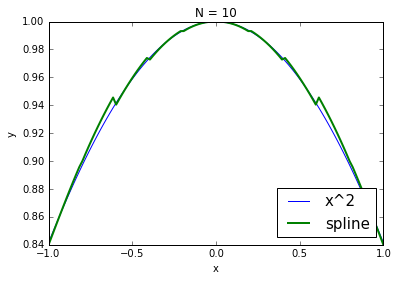

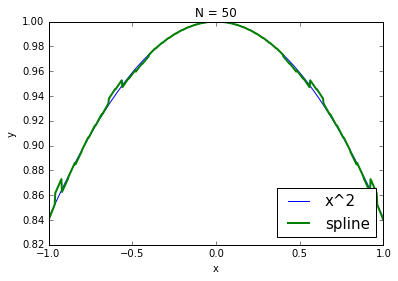

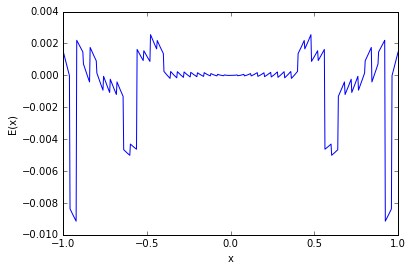

In [26]:
x = np.linspace(a, b, len(y_spline_1))
plt.plot(x, f_vect(function, x), label="x^2")
plt.plot(x, y_spline_1, linewidth=2, label="spline")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=15, loc=4)
plt.xlim(a, b)
plt.title('N = 10')
plt.show()


x = np.linspace(a, b, len(y_spline_2))
plt.plot(x, f_vect(function, x), label="x^2")
plt.plot(x, y_spline_2, linewidth=2, label="spline")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=15, loc=4)
plt.xlim(a, b)
plt.title('N = 50')
plt.show()


x = np.linspace(a, b, len(y_spline_2))
plt.plot(x, f_vect(function, x) - y_spline_2)
plt.xlabel('x')
plt.ylabel('E(x)')
plt.xlim(a, b)
plt.show()

И на случай осциллирующей функции:

In [27]:
function = 'x*math.cos(8*x)'
a = 1
b = 2
N = 10
points = []

In [28]:
y_spline_1 = getInterpolation(a, b, N, function, points)

In [29]:
N = 50
points = []

In [30]:
y_spline_2 = getInterpolation(a, b, N, function, points)

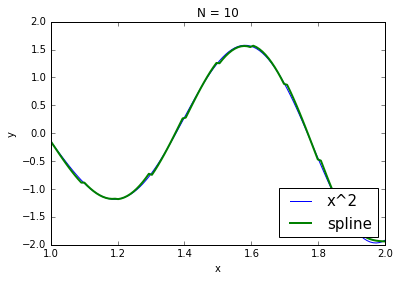

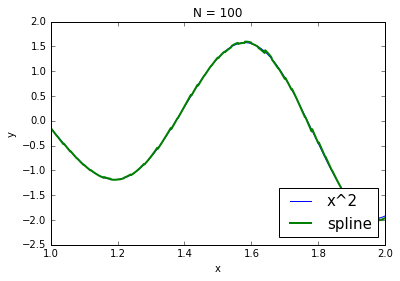

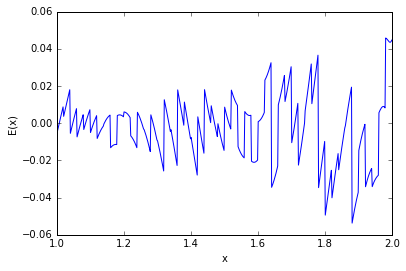

In [31]:
x = np.linspace(a, b, len(y_spline_1))
plt.plot(x, f_vect(function, x), label="x^2")
plt.plot(x, y_spline_1, linewidth=2, label="spline")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=15, loc=4)
plt.xlim(a, b)
plt.title('N = 10')
plt.show()


x = np.linspace(a, b, len(y_spline_2))
plt.plot(x, f_vect(function, x), label="x^2")
plt.plot(x, y_spline_2, linewidth=2, label="spline")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=15, loc=4)
plt.xlim(a, b)
plt.title('N = 100')
plt.show()


x = np.linspace(a, b, len(y_spline_2))
plt.plot(x, f_vect(function, x) - y_spline_2)
plt.xlabel('x')
plt.ylabel('E(x)')
plt.xlim(a, b)
plt.show()

Во всех трех случаях ошибка интерполяции не превосходит по модулю 0.05